In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()

In [2]:
df = pd.read_csv("/Users/zain/Desktop/master.csv")
df.head(5)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [3]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [4]:
df=df.rename(columns={df.columns[9]:'GDP'})
df.head(10)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,GDP,gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


In [5]:
df.iloc[0,9], df.columns[9]

('2,156,624,900', 'GDP')

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
sc = StandardScaler()
gen_transformed = le.fit_transform(df['generation'])

In [15]:
df['gen_transformed'] = [i for i in gen_transformed] #transformed gender, 0-5 -- discrete vals

In [26]:
for i in range(10):
    print("actual value {}, tranformed value {}".format(df['generation'][i],df['gen_transformed'][i])) # short check

actual value Generation X, tranformed value 2
actual value Silent, tranformed value 5
actual value Generation X, tranformed value 2
actual value G.I. Generation, tranformed value 1
actual value Boomers, tranformed value 0
actual value G.I. Generation, tranformed value 1
actual value Silent, tranformed value 5
actual value Boomers, tranformed value 0
actual value G.I. Generation, tranformed value 1
actual value Generation X, tranformed value 2


In [45]:
df['gender'] = [i for i in le.fit_transform(df['sex'])] #transform gender to numeric bound (0,1)-- discrete!
df['Country_2'] = [i for i in le.fit_transform(df['country'])] # assigning a float val to a bunch fo countries!

In [39]:
vals = [] ## Now, need to setup values for age, since that is a string
for i in df['age']:
    if i[1] != '-':
        vals.append(int(i[0:2])+7.5)
    else:
        vals.append(int(i[0])+7.5)
        
df['age_2'] = [i for i in vals]

In [46]:
df.head(5)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,GDP,gdp_per_capita ($),generation,gen_transformed,gender,age_2,Country_2
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X,2,1,22.5,0
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent,5,1,42.5,0
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X,2,0,22.5,0
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation,1,1,82.5,0
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers,0,1,32.5,0


In [47]:
df.describe() #now this looks better! more features -- indepdent, explanatory variables to be regressed on!

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($),gen_transformed,gender,age_2,Country_2
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414,2.701869,0.500000,42.534508,49.275270
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472,1.809836,0.500009,23.797109,29.372538
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000,0.000000,0.000000,12.500000,0.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000,1.000000,0.000000,22.500000,24.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000,2.000000,0.500000,42.500000,47.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000,4.000000,1.000000,62.500000,74.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000,5.000000,1.000000,82.500000,100.000000


In [57]:
X = pd.DataFrame(df, columns = ['year','suicides_no','population',
                 'suicides/100k pop','gdp_per_capita ($)','gen_transformed',
                 'gender','age_2','Country_2'])

X = X.drop(['suicides_no'], axis=1)

Y = pd.DataFrame(df, columns = ['suicides_no'])

Y.head(10), X.head(10)

(   suicides_no
 0           21
 1           16
 2           14
 3            1
 4            9
 5            1
 6            6
 7            4
 8            1
 9            0,
    year  population  suicides/100k pop  gdp_per_capita ($)  gen_transformed  \
 0  1987      312900               6.71                 796                2   
 1  1987      308000               5.19                 796                5   
 2  1987      289700               4.83                 796                2   
 3  1987       21800               4.59                 796                1   
 4  1987      274300               3.28                 796                0   
 5  1987       35600               2.81                 796                1   
 6  1987      278800               2.15                 796                5   
 7  1987      257200               1.56                 796                0   
 8  1987      137500               0.73                 796                1   
 9  1987      311000   

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2) # 20% testing, 80% training 

X_train.shape, Y_train.shape # X values here would be the 8 features -> beta1,..,beta8

((22256, 8), (22256, 1))

In [60]:
X_test.shape, Y_test.shape

((5564, 8), (5564, 1))

In [67]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

model = linear_model.LinearRegression()

In [68]:
model.fit(X_train, Y_train)

LinearRegression()

In [69]:
Y_pred = model.predict(X_test)

In [70]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred))

Coefficients: [[ 2.31640980e-01  1.43595537e-04  1.34039211e+01  5.16073182e-04
  -7.52272398e+00  7.34574830e+01  8.10672893e-02  2.37305820e-01]]
Intercept: [-695.25409673]
Mean squared error (MSE): 445511.04
Coefficient of determination (R^2): 0.45


Suicide_no = -695.254 + 2.316(year) + 1.4359(population) + 1.3403(suicides/100k) + 5.160(Gdp_per_capita) -7.522(generation 'dummy') + 7.345(gender "dummy") + 8.106(age) + 2.373(country)

In [75]:
Y_test = np.array(Y_test)

In [87]:
len(Y_test), len(Y_pred)

(5564, 5564)

In [90]:
df = pd.DataFrame({'Y_test': [Y_test], 'Y_pred': [Y_pred]})

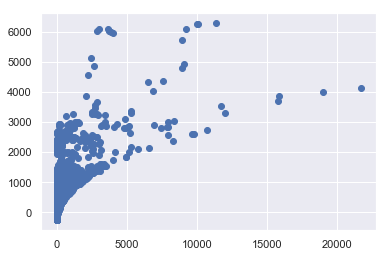

In [93]:
plt.scatter(Y_test, Y_pred) # heteroskidastic features 

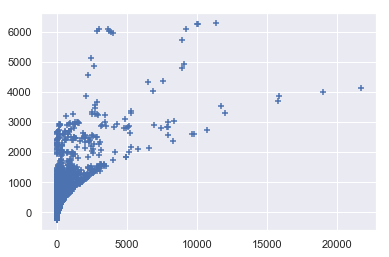

In [94]:
plt.scatter(Y_test, Y_pred, marker= '+') 

In [98]:
X.corr()

,year,population,suicides/100k pop,gdp_per_capita ($),gen_transformed,gender,age_2,Country_2
year,1.000000,0.008850,-0.039037,3.391343e-01,2.683006e-01,0.000000e+00,2.524154e-03,2.276923e-02
population,0.008850,1.000000,0.008285,8.150986e-02,-6.796261e-02,-1.124208e-02,-8.818803e-02,1.588961e-01
suicides/100k pop,-0.039037,0.008285,1.000000,1.785134e-03,-4.982007e-02,3.914965e-01,3.547830e-01,5.522414e-02
gdp_per_capita ($),0.339134,0.081510,0.001785,1.000000e+00,8.289921e-02,1.336263e-18,6.755319e-04,5.334082e-02
gen_transformed,0.268301,-0.067963,-0.049820,8.289921e-02,1.000000e+00,-4.145525e-19,6.408823e-02,6.068990e-03
gender,0.000000,-0.011242,0.391496,1.336263e-18,-4.145525e-19,1.000000e+00,3.863840e-19,-5.217358e-20
age_2,0.002524,-0.088188,0.354783,6.755319e-04,6.408823e-02,3.863840e-19,1.000000e+00,-1.092447e-04
Country_2,0.022769,0.158896,0.055224,5.334082e-02,6.068990e-03,-5.217358e-20,-1.092447e-04,1.000000e+00


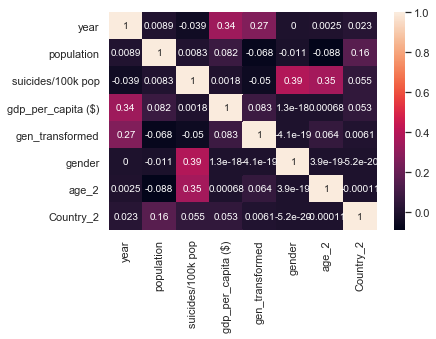

In [109]:
corrMatrix = X.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()